# Business Opportunity Knowledge Graph

#### Data Sources:
- PostgreSQL database: `nourish@awesome-hw.sdsc.edu`
- Neo4j database: `awesome-compute.sdsc.edu`

#### Steps:

[Setup](#setup)<br>

[1. Connect to Data Sources](#1-connect-to-data-sources)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Connect to PostgreSQL Database](#1.1-connect-to-postgresql-database)
<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Connect to Neo4j Database](#1.2-connect-to-neo4j-database)
<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Connect to Local Neo4j Database](#1.3-connect-to-local-neo4j-database)
<br>

[2. Extract and Transform Data](#2-extract-and-transform-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Extract Entity Data](#2.1-extract-entity-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Extract Relationship Data](#2.2-extract-relationship-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Save Data](#2.3-save-data)<br>

[3. Load Data into Neo4j](#3-load-data-into-neo4J)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Load Entity Nodes](#3.1-load-entity-nodes)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Load Entity Relationships](#3.2-load-entity-relationships)<br>

[5. Query Data in Neo4j](#5-query-data-in-neo4J)<br>


### Setup

Packages

In [2]:
import pandas as pd
import psycopg2
import os

from neo4j import GraphDatabase
from decimal import Decimal
from dotenv import load_dotenv

1. Create `.env` file and input the data source credentials

In [3]:
# Put credentials in .env file

load_dotenv("../.env")

keys = ["DB_USER", "DB_PASSWORD",
    # "NEO4J_USER", "NEO4J_PASSWORD"
    "NEO4J_URI_LOCAL", "NEO4J_USER_LOCAL", "NEO4J_PASSWORD_LOCAL"
    ]
for key in keys:
    if key not in os.environ:
        raise Exception(f"Key '{key}' not found not in .env")
    
print("Credentials from .env file successfully loaded")

Credentials from .env file successfully loaded


2. Create Neo4J local instance

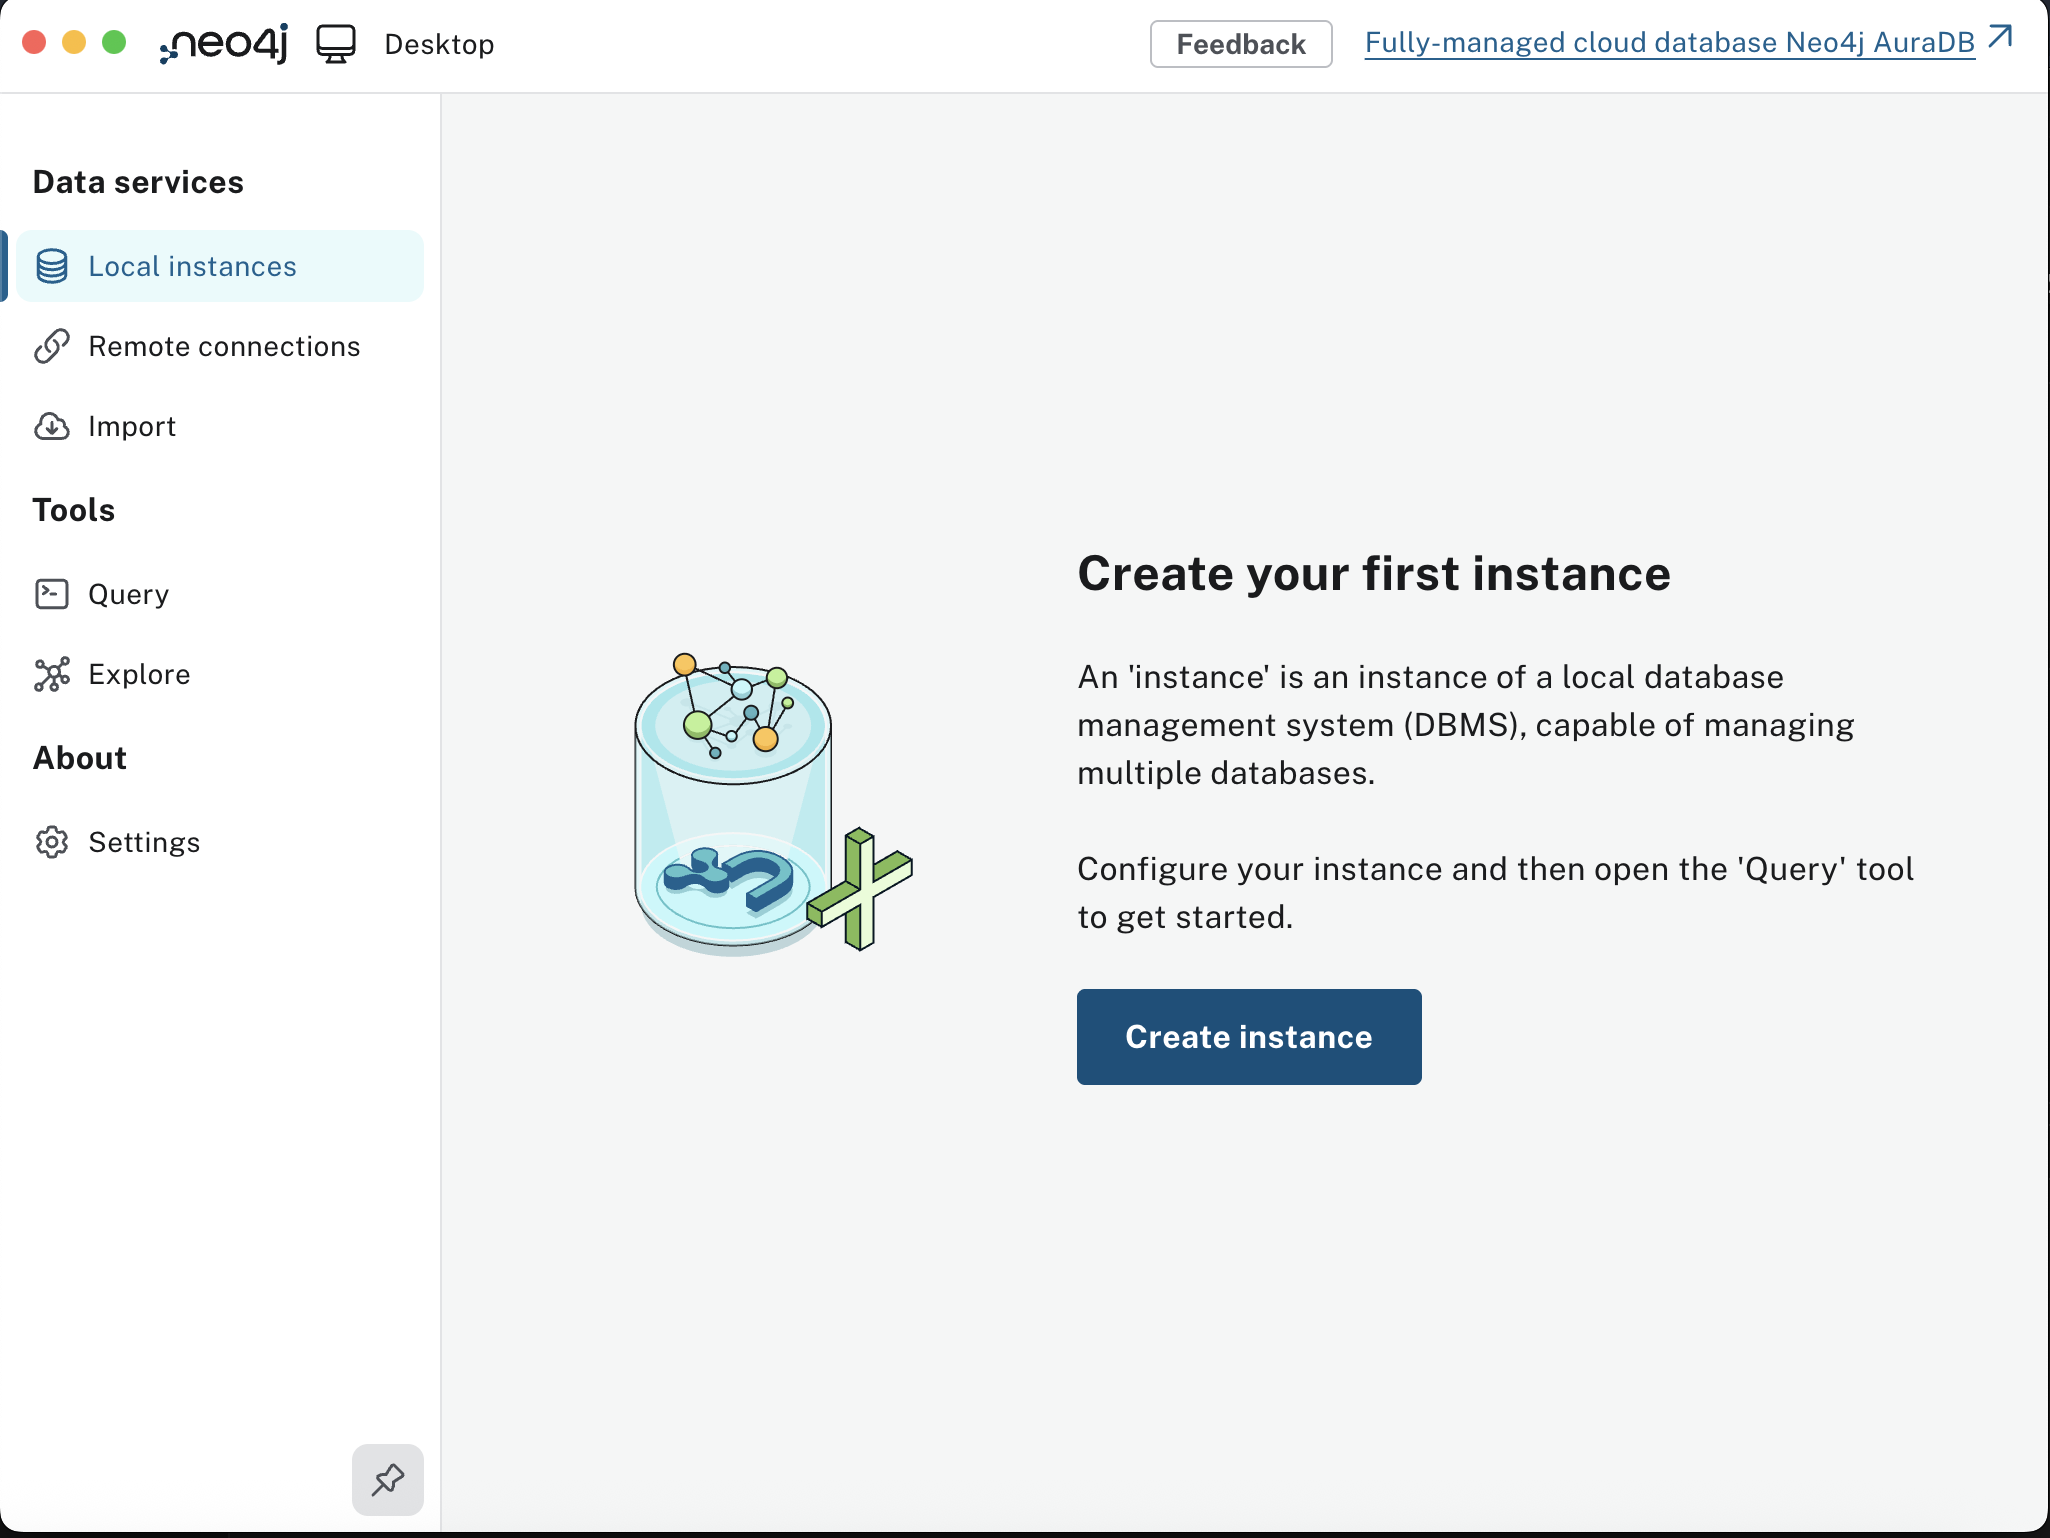
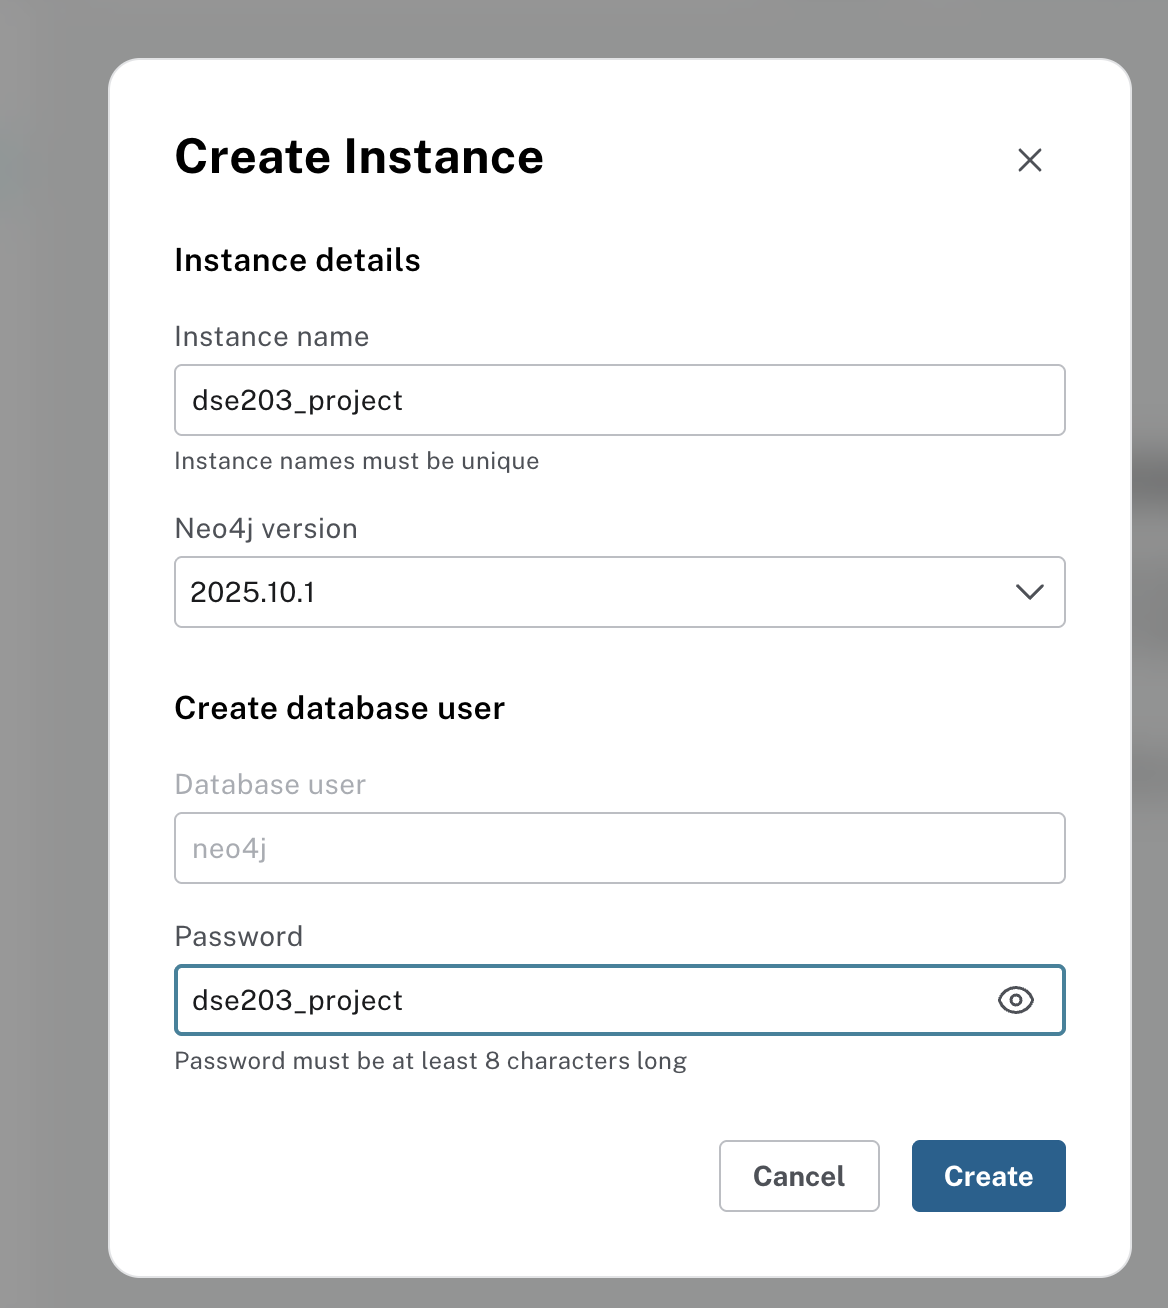

### 1. Connect to Data Sources

#### 1.1 Connect to PostgreSQL Database

In [25]:
nourish_conn = psycopg2.connect(
    host="awesome-hw.sdsc.edu",
    port=5432,
    dbname="nourish",
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD")
)

def query_nourish(query):
    """Query the nourish database and return data as a `pd.Dataframe`"""
    with nourish_conn.cursor() as cursor:
        cursor.execute(query)
        columns = [desc[0] for desc in cursor.description]
        rows = cursor.fetchall()
    
    return pd.DataFrame(rows, columns=columns)

df = query_nourish("SELECT COUNT(*) FROM INFORMATION_SCHEMA.TABLES")
num_tables = df.iloc[0,0]
print(f"Connection successful: {num_tables} tables found in the postgres database.")

Connection successful: 372 tables found in the postgres database.


In [17]:
nourish_conn = psycopg2.connect(
    host="awesome-hw.sdsc.edu",
    port=5432,
    dbname="nourish",
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD")
)

def query_nourish(query):
    """Query the nourish database and return data as a `pd.Dataframe`"""
    with nourish_conn.cursor() as cursor:
        cursor.execute(query)
        columns = [desc[0] for desc in cursor.description]
        rows = cursor.fetchall()
    
    return pd.DataFrame(rows, columns=columns)

df = query_nourish("SELECT COUNT(*) FROM INFORMATION_SCHEMA.TABLES")
num_tables = df.iloc[0,0]
print(f"Connection successful: {num_tables} tables found in the postgres database.")

Connection successful: 372 tables found in the postgres database.


#### 1.2 Connect to Nourish Ontology Neo4J Database

In [7]:
#if "NEO4J_USER" not in os.environ:
#    raise Exception(f"Key 'NEO4J_USER' not found not in .env")

#if "NEO4J_PASSWORD" not in os.environ:
#    raise Exception(f"Key 'NEO4J_PASSWORD' not found not in .env")

#awesome_driver = GraphDatabase.driver(
#     "bolt://awesome-compute.sdsc.edu:7687",
#     auth=(os.getenv("NEO4J_USER"), os.getenv("NEO4J_PASSWORD"))
#)

#with awesome_driver.session() as session:
#    result = session.run("MATCH (n) UNWIND labels(n) AS label RETURN count(DISTINCT label) AS count")
#    num_nodes = result.single()["count"]
#    print(f"Connection Successful: {num_nodes} unique node types found in the graph database")

#### 1.3 Connect to Group 4 Neo4J Database

In [4]:
# Setup remote group neo4j instance with the following credentials
# This is the database we will write to and use in our project
group_driver = GraphDatabase.driver(
     "bolt://67.58.49.87:7687",
     auth=("neo4j", "h2u9l4px")
)


# group_driver = GraphDatabase.driver(
#      os.getenv("NEO4J_URI_GROUP"),
#      auth=(os.getenv("NEO4J_USER_GROUP"), os.getenv("NEO4J_PASSWORD_GROUP"))
# )
with group_driver.session() as session:
    result = session.run("MATCH (n) UNWIND labels(n) AS label RETURN count(DISTINCT label) AS count")
    num_nodes = result.single()["count"]
    print(f"Connection Successful: {num_nodes} unique node types found in the graph database")

Connection Successful: 11 unique node types found in the graph database


#### 1.4 Connect to Local Neo4J Database

In [8]:
# Setup local neo4j instance with the following credentials
# This is the database we will write to and use in our project
local_driver = GraphDatabase.driver(
     os.getenv("NEO4J_URI_LOCAL"),
     auth=(os.getenv("NEO4J_USER_LOCAL"), os.getenv("NEO4J_PASSWORD_LOCAL"))
)

with local_driver.session() as session:
    result = session.run("MATCH (n) UNWIND labels(n) AS label RETURN count(DISTINCT label) AS count")
    num_nodes = result.single()["count"]
    print(f"Connection Successful: {num_nodes} unique node types found in the graph database")

Connection Successful: 11 unique node types found in the graph database


### 2. Extract and Transform Data

#### 2.1 Extract Entity Data

##### Entity 1: `State`

In [7]:
query = """
    SELECT
    1 as id,
    'CA' as code,
    'California' as name
"""

state_df = query_nourish(query)
print(f"Rows: {state_df.shape[0]}, Columns: {state_df.shape[1]}")
state_df.head()

Rows: 1, Columns: 3


,id,code,name
0,1,CA,California


##### Entity 2: `County`

In [8]:
query= """
SELECT id, county as name
FROM county_neighborhoods
"""

county_df = query_nourish(query)
print(f"Rows: {county_df.shape[0]}, Columns: {county_df.shape[1]}")
county_df.head()

Rows: 58, Columns: 2


,id,name
0,1,Alameda
1,2,Alpine
2,3,Amador
3,4,Butte
4,5,Calaveras


##### Entity 3: `City`

In [ ]:
query = """
WITH cte AS (
    SELECT
        c.id,
        c.city,
        ST_Union(op.way) AS geom,  -- merge all polygons for that city
        MIN(ons.osm_id) AS osm_id  -- arbitrary representative ID
    FROM
        city_neighborhoods c
    LEFT JOIN osm_planet_socal_2025.osn_names ons
        ON c.city = ons.name
        AND ons.geom_type = 'polygon'
    LEFT JOIN osm_planet_socal_2025.planet_osm_polygon op
        ON ons.osm_id = op.osm_id
        AND ons.geom_type = 'polygon'
    WHERE
        op.osm_id < 0
        AND county = 'San Diego'
    GROUP BY
        c.city,
        c.id
)
SELECT
    id,
    city as name,
    ST_Transform(geom, 4326) AS geom,
    st_aswkt(ST_Transform(geom, 4326)) AS geom_wkt,
    ST_Centroid(ST_Transform(geom, 4326)) AS centroid

FROM cte; 
"""


city_df = query_nourish(query)
print(f"Rows: {city_df.shape[0]}, Columns: {city_df.shape[1]}")
city_df.head()

Rows: 52, Columns: 5


,id,name,geom,geom_ewkt,centroid
0,8,Carlsbad,0103000020E6100000010000001D0300000EC40D53365A...,SRID=4326;POLYGON((-117.4095657 33.13256549958...,0101000020E610000049A785B9EB535DC041F8FAFE4F8F...
1,9,Chula Vista,0103000020E610000002000000170600009710BDD6EF47...,SRID=4326;POLYGON((-117.1240136 32.64636589959...,0101000020E61000003AB1DC6FEC405DC0D69967816650...
2,10,Coronado,0103000020E6100000020000007A0100000DF3D4D97F4E...,SRID=4326;POLYGON((-117.2265534 32.69039019959...,0101000020E61000000A7445D09F4A5DC054781F833252...
3,11,Del Mar,0103000020E610000001000000CD000000C7EDE1DC7051...,SRID=4326;POLYGON((-117.2725136 32.98013869958...,0101000020E610000023007032CF505DC09BE5A83B4C7B...
4,12,El Cajon,0103000020E61000000100000013090000DE2230D6B740...,SRID=4326;POLYGON((-117.0112205 32.82028659958...,0101000020E61000002CD85DA9783D5DC01DEE5A859D66...


##### Entity 4: `Community`

In [10]:
query = """
SELECT id, community as name
FROM community_neighborhoods
WHERE county = 'San Diego';
"""

community_df = query_nourish(query)
print(f"Rows: {community_df.shape[0]}, Columns: {community_df.shape[1]}")
community_df.head()

Rows: 229, Columns: 2


,id,name
0,60,Midtown
1,55,Linda Vista
2,284,Eastlake Trails
3,285,Eastlake Vistas
4,283,Eastlake Land Swap


##### Entity 5: `Zipcode`

In [ ]:
query = """
WITH san_diego_zipcodes AS (

SELECT DISTINCT CAST(unnest(zipcodes) AS TEXT) as zipcode
FROM city_neighborhoods
WHERE county = 'San Diego'

UNION

SELECT DISTINCT CAST(unnest(zipcodes) AS TEXT) as zipcode
FROM community_neighborhoods
WHERE county = 'San Diego'
)

SELECT

t.zipcode,
ST_Transform(s.geom, 4326) AS geom
st_aswkt(ST_Transform(geom, 4326)) AS geom_wkt,
ST_Centroid(ST_Transform(geom, 4326)) AS centroid

FROM
san_diego_zipcodes t
JOIN
test_zipcodes s ON t.zipcode = s.zip::text;
"""


zipcode_df = query_nourish(query)
zipcode_df["id"] = zipcode_df.index + 1
zipcode_df = zipcode_df[["id", "zipcode"]]
print(f"Rows: {zipcode_df.shape[0]}, Columns: {zipcode_df.shape[1]}")
zipcode_df.head()

Rows: 105, Columns: 2


,id,zipcode
0,1,91901
1,2,91902
2,3,91905
3,4,91906
4,5,91910


##### Entity 6: `Business Location`

In [ ]:
# query = """
# SELECT
# *

# FROM ca_businesses_with_ai_franchise
# """

query = """
SELECT
    
    id,
    name,
    url,
    address,
    city,
    zip,
    latitude,
    longitude,
    blockgroup,
    categories,
    avg_rating,
    franchise,
    confidence,
    reasoning,
    ST_Transform(geom, 4326) AS geom,
    st_aswkt(ST_Transform(geom, 4326)) AS geom_wkt

FROM ca_businesses_with_ai_franchise
"""

business_location_df = query_nourish(query)
business_location_df[business_location_df["city"].isin(city_df["name"].values)]
print(f"Rows: {business_location_df.shape[0]}, Columns: {business_location_df.shape[1]}")
business_location_df.head()

Rows: 39593, Columns: 16


,id,name,url,address,city,zip,latitude,longitude,blockgroup,categories,avg_rating,franchise,confidence,reasoning,geom,geom_ewkt
0,5,Internet Solutions For Less,https://www.google.com/maps/place//data=!4m2!3...,"Internet Solutions For Less, 733 Las Palmas Dr...",Vista,92081,33.1863539,-117.25029649999999,197021,"[Website designer, Design agency, Internet mar...",5,INDEPENDENT,0.85,The business name 'Internet Solutions For Less...,0101000020E610000068739CDB04505DC0B4FDD071DA97...,SRID=4326;POINT(-117.2502965 33.1863539)
1,24,Wetzel's Pretzels,https://www.google.com/maps/place//data=!4m2!3...,"Wetzel's Pretzels, 869 W. Harbor Drive, #C2-F,...",San Diego,92101,32.708565199999995,-117.17027739999999,54023,[Pretzel store],3.9,FRANCHISE,0.95,Wetzel's Pretzels is a well-known chain specia...,0101000020E6100000DD0F2ED3E54A5DC0B68AB443B25A...,SRID=4326;POINT(-117.1702774 32.7085652)
2,48,Del Mar Golf Center - Pelly's Mini Golf,https://www.google.com/maps/place//data=!4m2!3...,"Del Mar Golf Center - Pelly's Mini Golf, 15555...",Del Mar,92014,32.976022799999996,-117.2534354,83241,"[Golf driving range, Golf instructor, Miniatur...",4.4,INDEPENDENT,0.85,The business name 'Del Mar Golf Center - Pelly...,0101000020E610000084A91C4938505DC03E13AB50EE7C...,SRID=4326;POINT(-117.2534354 32.9760228)
3,49,Brainy Actz Escape Rooms San Diego,https://www.google.com/maps/place//data=!4m2!3...,"Brainy Actz Escape Rooms San Diego, 10211 Paci...",San Diego,92121,32.9033799,-117.19029889999999,83462,"[Escape room center, Children's amusement cent...",4.3,FRANCHISE,0.85,The name 'Brainy Actz Escape Rooms' suggests a...,0101000020E6100000BEFD6FDB2D4C5DC08F2EDBF3A173...,SRID=4326;POINT(-117.1902989 32.9033799)
4,50,Einstein Bros. Bagels,https://www.google.com/maps/place//data=!4m2!3...,"Einstein Bros. Bagels, 911 Lomas Santa Fe Dr, ...",Solana Beach,92075,32.9942243,-117.25523469999999,173061,"[Bagel shop, Bakery, Breakfast restaurant, Caf...",3.9,FRANCHISE,0.95,Einstein Bros. Bagels is a well-known chain wi...,0101000020E61000007A53ECC355505DC0BAB1EABD427F...,SRID=4326;POINT(-117.2552347 32.9942243)


In [32]:
def combine_unique_categories(series):
    all_cats = []
    for sublist in series:
        if isinstance(sublist, list):
            all_cats.extend(sublist)
    return sorted(set(all_cats))

business_df = (
    business_location_df.groupby("name", dropna=False)["categories"]
      .apply(combine_unique_categories)
      .reset_index(name="categories")
)

business_df["num_locations"] = business_location_df.groupby("name")["name"].count().values
business_df["id"] = business_df.index + 1
business_df = business_df[["id", "name", "num_locations", "categories"]]

print(f"Rows: {business_df.shape[0]}, Columns: {business_df.shape[1]}")
business_df.sort_values(by="num_locations", ascending=False).head()

Rows: 32010, Columns: 4


,id,name,num_locations,categories
26591,26592,Starbucks,258,"[Breakfast restaurant, Cafe, Coffee shop, Coff..."
26850,26851,Subway,144,"[Caterer, Fast food restaurant, Restaurant, Sa..."
286,287,7-Eleven,136,"[ATM, Bakery, Beer store, Candy store, Coffee ..."
13590,13591,Jack in the Box,86,"[Breakfast restaurant, Brunch restaurant, Burr..."
17190,17191,McDonald's,83,"[American restaurant, Breakfast restaurant, Co..."


##### Entity 8: `Block Group`

In [ ]:
query = """
SELECT

    bd.std_geography_id AS geo_id,
    sbg.ctblockgroup,
    cs.X1001FY_X,
    S23_EMP,
    N01_BUS,
    cs.X1024_X,
    S22_BUS,
    N14_BUS,
    N37_SALES,
    N35_BUS,
    S16_SALES,
    MEDHINC_CY,
    AVGHINC_CY,
    GINI_FY,
    INDMANU_CY,
    TOTPOP_CY,
    FEM25,
    FEM30,
    FEM35,
    MALE25,
    MALE30,
    MALE35,
    CRMCYTOTC,
    DI100_CY,
    DI150_CY,
    countyfp,
    tractce,
    population,
    apportionm,
    blkgrpce,
    sbg.ogc_fid,
    statefp,
    aggregatio,
    source_cou,
    ST_Transform(sbg.geom, 4326) AS geom,
    st_aswkt(ST_Transform(geom, 4326)) AS geom_wkt,
    ST_Centroid(ST_Transform(geom, 4326)) AS centroid
FROM sandag_layer_census_block_groups sbg
LEFT JOIN bgs_sd_imp imp
    ON CAST(sbg.ctblockgroup AS TEXT) = CAST(CONCAT(LTRIM(imp.tractce, '0'), imp.blkgrpce) AS TEXT)
LEFT JOIN esri_business_data bd
    ON TRIM(LEADING '0' FROM SUBSTR(CAST(bd.std_geography_id AS TEXT), 5)) = CAST(sbg.ctblockgroup AS TEXT)
LEFT JOIN esri_consumer_spending_cols cs
    ON TRIM(LEADING '0' FROM SUBSTR(CAST(cs.std_geography_id AS TEXT), 5)) = CAST(sbg.ctblockgroup AS TEXT)
ORDER BY sbg.ctblockgroup ASC;
"""

block_group_df = query_nourish(query)
print(f"Rows: {block_group_df.shape[0]}, Columns: {block_group_df.shape[1]}")
block_group_df.head()

Rows: 2085, Columns: 37


,geo_id,ctblockgroup,x1001fy_x,s23_emp,n01_bus,x1024_x,s22_bus,n14_bus,n37_sales,n35_bus,...,population,apportionm,blkgrpce,ogc_fid,statefp,aggregatio,source_cou,geom,geom_ewkt,centroid
0,60730001001,1001,115362302,91,30,349221,0,0,169,3,...,2.191,2.576,1,1,06,BlockApportionment:US.BlockGroups;PointsLayer:...,USA,0106000020E610000001000000010300000001000000B8...,SRID=4326;MULTIPOLYGON(((-117.188567830914 32....,0101000020E6100000F9DD3870B24B5DC0799CEE388760...
1,60730001002,1002,179816406,195,59,569578,2,0,12628,9,...,2.191,2.576,2,2,06,BlockApportionment:US.BlockGroups;PointsLayer:...,USA,0106000020E61000000100000001030000000100000031...,SRID=4326;MULTIPOLYGON(((-117.187773001776 32....,0101000020E6100000AFC67FB20C4C5DC02FD966214060...
2,60730002011,2011,64440225,345,82,209780,4,0,1080,5,...,2.191,2.576,1,3,06,BlockApportionment:US.BlockGroups;PointsLayer:...,USA,0106000020E61000000100000001030000000100000088...,SRID=4326;MULTIPOLYGON(((-117.169610001679 32....,0101000020E61000003299120A344B5DC0EC97B3AF9460...
3,60730002012,2012,95423500,333,154,323824,18,1,3819,11,...,2.191,2.576,2,4,06,BlockApportionment:US.BlockGroups;PointsLayer:...,USA,0106000020E61000000100000001030000000100000062...,SRID=4326;MULTIPOLYGON(((-117.172342000794 32....,0101000020E6100000779362E9F44A5DC00471F9E05B60...
4,60730002021,2021,90161948,100,64,259785,4,0,14428,17,...,2.191,2.576,1,5,06,BlockApportionment:US.BlockGroups;PointsLayer:...,USA,0106000020E6100000010000000103000000010000008D...,SRID=4326;MULTIPOLYGON(((-117.172285001534 32....,0101000020E610000037A66881594B5DC022ECE625385F...


##### Entity 9: `Zone Location`

In [35]:
query = """
SELECT
id,
zone_name,
imp_date,
ordnum,
shape_length,
shape_area,
legend,
ST_Transform(geom, 4326) AS geom,
ST_asewkt(ST_Transform(geom, 4326)) AS geom_ewkt,
ST_Centroid(ST_Transform(geom, 4326)) AS centroid

FROM sandag_layer_zoning_base_sd_new
"""

zone_location_df = query_nourish(query)
print(f"Rows: {zone_location_df.shape[0]}, Columns: {zone_location_df.shape[1]}")
zone_location_df.head()

Rows: 3677, Columns: 10


,id,zone_name,imp_date,ordnum,shape_length,shape_area,legend,geom,geom_ewkt,centroid
0,1,AG-1-1,1141084800000,R-301263,281.423966,2.601150e+03,"Agricultural-General zone, use package 1, deve...",0106000020E6100000010000000103000000010000000E...,SRID=4326;MULTIPOLYGON(((-117.12982648288 33.0...,0101000020E610000058C500454C485DC0EA352115F485...
1,6,AG-1-1,1141084800000,R-301263,3197.909381,2.041669e+05,"Agricultural-General zone, use package 1, deve...",0106000020E61000000100000001030000000100000085...,SRID=4326;MULTIPOLYGON(((-117.037822960772 33....,0101000020E61000002A608A6D56425DC0F1B74447B289...
2,7,AG-1-1,1141084800000,R-301263,85544.431621,6.369870e+07,"Agricultural-General zone, use package 1, deve...",0106000020E61000000100000001030000000100000040...,SRID=4326;MULTIPOLYGON(((-117.106843080255 33....,0101000020E610000008FC9AE8AC465DC0D497FCB2CE87...
3,8,AG-1-1,1141084800000,R-301263,17855.440197,7.212937e+06,"Agricultural-General zone, use package 1, deve...",0106000020E610000001000000010300000001000000C8...,SRID=4326;MULTIPOLYGON(((-116.972290881461 33....,0101000020E6100000312BACEBAC3D5DC09146E002718A...
4,9,AG-1-1,1141084800000,R-301263,168.046707,1.087063e+03,"Agricultural-General zone, use package 1, deve...",0106000020E6100000010000000103000000010000000B...,SRID=4326;MULTIPOLYGON(((-116.905763399499 33....,0101000020E6100000EA51C073F9395DC06CA3C469168B...


##### Entity 10: `Zone Type`

In [36]:
query = """
SELECT
DISTINCT(zone_name),
legend

FROM sandag_layer_zoning_base_sd_new
"""

zone_type_df = query_nourish(query)
print(f"Rows: {zone_location_df.shape[0]}, Columns: {zone_type_df.shape[1]}")
zone_type_df.head()

Rows: 3677, Columns: 2


,zone_name,legend
0,OF-1-1,Open Space-Floodplain zone (floodplain areas)
1,CC-2-5,Other or Undefined Zone
2,CC-5-1,Commercial-Community zones (special areas)
3,CUPD-CT-2-3,Central Urbanized Planned District
4,LJPD-6A,La Jolla Planned District


#### 2.2 Extract Relationship Data

In [ ]:
BUSINESS_LIMIT = "LIMIT 2000" # Set to "" for all businesses

relationship_df = query_nourish(
f"""
-- (county) -> contained_in -> (state)
(
    SELECT
        county AS entity1,
        'County' AS entitytype1,
        'contained_in' AS predicate,
        state_name AS entity2,
        'State' AS entitytype2
    FROM county_neighborhoods
)

UNION

-- (city) -> contained_in -> (county)
(
    SELECT
        city AS entity1,
        'City' AS entitytype1,
        'contained_in' AS predicate,
        county AS entity2,
        'County' AS entitytype2
    FROM city_neighborhoods
)

UNION

-- (community) -> contained_in -> (city)
(
    SELECT
        community AS entity1,
        'Community' AS entitytype1,
        'contained_in' AS predicate,
        city AS entity2,
        'City' AS entitytype2
    FROM community_neighborhoods
)

UNION

-- (county) -> adjacent_to -> (county)
(
    SELECT
        county AS entity1,
        'County' AS entitytype1,
        'adjacent_to' AS predicate,
        unnest(neighboring_counties) AS entity2,
        'County' AS entitytype2
    FROM county_neighborhoods
)

UNION

-- (city) -> adjacent_to -> (city)
(
    SELECT
        city AS entity1,
        'City' AS entitytype1,
        'adjacent_to' AS predicate,
        unnest(neighboring_cities) AS entity2,
        'City' AS entitytype2
    FROM city_neighborhoods
)

UNION

-- (community) -> adjacent_to -> (community)
(
    SELECT
        community AS entity1,
        'Community' AS entitytype1,
        'adjacent_to' AS predicate,
        unnest(neighboring_communities) AS entity2,
        'Community' AS entitytype2
    FROM community_neighborhoods
)

UNION

-- (city) -> nearby -> (city)
(
    SELECT
        city AS entity1,
        'City' AS entitytype1,
        'nearby' AS predicate,
        unnest(nearby_cities) AS entity2,
        'City' AS entitytype2
    FROM city_neighborhoods
)

UNION

-- (community) -> nearby -> (community)
(
    SELECT
        community AS entity1,
        'Community' AS entitytype1,
        'nearby' AS predicate,
        unnest(nearby_communities) AS entity2,
        'Community' AS entitytype2
    FROM community_neighborhoods
)

UNION

-- (community) -> overlaps_with -> (zipcode)
(
    SELECT
        community AS entity1,
        'Community' AS entitytype1,
        'overlaps_with' AS predicate,
        unnest(zipcodes)::text AS entity2,
        'Zipcode' AS entitytype2
    FROM community_neighborhoods
)

UNION

-- (community) -> overlaps_with -> (blockgroup)
(
    select
        name as entity1,
        'Community' as entitytype1,
        'overlaps_with' as predicate,
        unnest(intersected_block_groups)::text as entity2,
        'BlockGroup' as entitytype2
    from nourish_community_block_group_intersection
)

UNION

-- (business) -> contained_in -> (blockgroup)
(
    SELECT
        id::TEXT AS entity1,
        'BusinessLocation' AS entitytype1,
        'contained_in' AS predicate,
        blockgroup::TEXT AS entity2,
        'BlockGroup' AS entitytype2
    FROM ca_businesses_with_ai_franchise
    {BUSINESS_LIMIT}
)

UNION

-- (business) -> contained_in -> (zipcode)
(
    SELECT
        id::TEXT AS entity1,
        'BusinessLocation' AS entityType1,
        'contained_in' AS predicate,
        zip::TEXT AS entity2,
        'Zipcode' AS entityType2
    FROM ca_businesses_with_ai_franchise
    {BUSINESS_LIMIT}
)

UNION

-- (business) -> contained_in -> (city)
(
    SELECT
        id::TEXT AS entity1,
        'BusinessLocation' AS entityType1,
        'contained_in' AS predicate,
        city::TEXT AS entity2,
        'City' AS entityType2
    FROM ca_businesses_with_ai_franchise
    {BUSINESS_LIMIT}
)

UNION

-- (Businesslocation) -> belongs -> (Business)
(
    SELECT
        id::TEXT AS entity1,
        'BusinessLocation' AS entityType1,
        'belongs_to' AS predicate,
        name::TEXT AS entity2,
        'Business' AS entityType2
    FROM ca_businesses_with_ai_franchise
    {BUSINESS_LIMIT}
)

UNION

-- (Zone location) -> belongs -> (Zone Type)
(
    SELECT
        id::TEXT AS entity1,
        'zone_location' AS entityType1,
        'belongs_to' AS predicate,
        zone_name::TEXT AS entity2,
        'zone_type' AS entityType2

FROM sandag_layer_zoning_base_sd_new
)





;




"""
)

print(f"Rows: {relationship_df.shape[0]}, Columns: {relationship_df.shape[1]}")
relationship_df.head()

Rows: 15976, Columns: 5


,entity1,entitytype1,predicate,entity2,entitytype2
0,,Community,overlaps_with,113001,BlockGroup
1,,Community,overlaps_with,99021,BlockGroup
2,10000,BusinessLocation,belongs_to,Star Nails Bar,Business
3,10000,BusinessLocation,contained_in,200172,BlockGroup
4,10000,BusinessLocation,contained_in,92081,Zipcode


#### 2.3 Save Data

In [ ]:
state_df.to_json("../data/state.json")
county_df.to_json("../data/county.json")
city_df.to_json("../data/city.json")
community_df.to_json("../data/community.json")
zipcode_df.to_json("../data/zipcode.json")
business_df.to_json("../data/business.json")
business_location_df.to_json("../data/business_location.json")
block_group_df.to_json("../data/block_group.json")
zone_location_df.to_json("../data/zone_location.json")
zone_type_df.to_json("../data/zone_type.json")
relationship_df.to_json("../data/relationship.json")

print("Data saved successfully")

Data successful saved


### 3. Load Data into neo4j

#### 3.1 Load Entity Nodes

Delete entity nodes function

In [8]:
def delete_entity_nodes(label: str):
    """Delete all entity nodes into Neo4j for a given label."""
    
    # with local_driver.session() as session:
    with group_driver.session() as session:
        label_exists = session.run(f"CALL db.labels() YIELD label WHERE label = '{label}' RETURN count(*) > 0 AS exists").single()["exists"]

        if label_exists:
            deleted_count = session.run(f"MATCH (n:`{label}`) DETACH DELETE n  RETURN count(n) AS deleted_count").single()["deleted_count"]
            print(f"Deleted {deleted_count} existing {label} nodes.")
        else:
            print(f"No {label} nodes found.")

Create entity nodes function

In [5]:
def create_entity_nodes(label: str, df: pd.DataFrame):
    """Create entity nodes into Neo4j for a given label."""

    # Convert df -> python dict
    data = df.to_dict(orient="records")

    def clean_value(v):
        if isinstance(v, Decimal):
            return float(v)
        return v

    data = []
    for row in df.to_dict(orient="records"):
        cleaned_row = {k: clean_value(v) for k, v in row.items()}
        if cleaned_row:
            data.append(cleaned_row)

    # with local_driver.session() as session:
    with group_driver.session() as session:
        create_query = f"""
            UNWIND $data AS row
            CREATE (n:`{label}`)
            SET n = row
            RETURN count(n) AS created
        """
        create_result = session.run(create_query, {"data": data})
        created_count = create_result.single()["created"]
        print(f"Created {created_count} new {label} nodes.")

Get entity data function

In [18]:
def get_entity_data(entity) -> pd.DataFrame:
    """
    Get entity data (pd.DataFrame)
    
    - Check if variable `entity_df` already exists
    - If not, read data from `../data/entity.json`
    """
    # Reads json file, if df variable does not exist
    df_name = f"{entity}_df"
    if df_name in globals() and isinstance(globals()[df_name], pd.DataFrame):
        df = globals()[df_name]
    else:
        data_filepath = f"../data/{entity}.json"
        df = pd.read_json(data_filepath)

    return df

Loop through each entity and load the data into neo4J

In [19]:
entities = [
    "state",
    "county",
    "city",
    "community",
    "zipcode",
    "business",
    "business_location",
    "block_group",
    "zone_location",
    "zone_type"
]

for entity in entities:

    # Get entity data
    df = get_entity_data(entity)

    # Get entity label name
    label = "".join([word.capitalize() for word in entity.split("_")])

    # Load entity nodes
    print(f"Loading {label} nodes...")
    delete_entity_nodes(label)
    create_entity_nodes(label, df)
    print("")


Loading State nodes...


NameError: name 'delete_entity_nodes' is not defined

#### 3.2 Load Entity Relationships

In [14]:
def get_relationship_count(label1, label2, relationship):
    """
    Get neo4J relationship count for a given node relationship. 0 if does not exist.
    """
    # with local_driver.session() as session:
    with group_driver.session() as session:
        result = session.run(f"""
        MATCH (n1:`{label1}`)-[r]-(n2:`{label2}`)
        RETURN DISTINCT
            TYPE(r) AS relationship,
            COUNT(*) as count
        """)
        relationship_counts = {(i["relationship"]): i["count"] for i in result}

    return relationship_counts.get(relationship, 0)

In [15]:
def delete_relationships(label1, label2, relationship):

    # Get current relationship count
    existing_count = get_relationship_count(label1, label2, relationship)

    if existing_count > 0:
        # Delete existing relationships
        # with local_driver.session() as session:
        with group_driver.session() as session:
            query = f"""
                MATCH (a:`{label1}`)-[r:{relationship}]->(b:`{label2}`)
                DELETE r
            """
            session.run(query)

        new_count = get_relationship_count(label1, label2, relationship)

        assert new_count == 0, f"All {relationship} relationships between {label1} and {label2} were not deleted"

    print(f"Deleted {existing_count} `{relationship}` relationships between {label1} and {label2}.")


In [ ]:
print("Deleting all existing relationships (edges) in Neo4j...")
for entity in entities:
    label = "".join([word.capitalize() for word in entity.split("_")])

    # with local_driver.session() as session:
    with group_driver.session() as session:        
        existing_count = session.run(f"MATCH (n:`{label}`)-[r]->() RETURN count(r) AS cnt").single()["cnt"]
        session.run(f"MATCH (n:`{label}`)-[r]->() DELETE r")
        
    print(f"-- {existing_count} relationships deleted for {label}.")

Deleting all existing relationships (edges) in Neo4j...
-- 0 relationships deleted for State.
-- 63 relationships deleted for County.
-- 276 relationships deleted for City.
-- 4337 relationships deleted for Community.
-- 0 relationships deleted for Zipcode.
-- 0 relationships deleted for Business.
-- 595665 relationships deleted for BusinessLocation.
-- 0 relationships deleted for BlockGroup.
-- 0 relationships deleted for ZoneLocation.
-- 0 relationships deleted for ZoneType.


In [21]:
relationship_df = get_entity_data("relationship")
relationship_types = relationship_df.groupby(["entitytype1", "entitytype2", "predicate"]).size().reset_index()
relationship_types

,entitytype1,entitytype2,predicate,0
0,BusinessLocation,BlockGroup,contained_in,2000
1,BusinessLocation,Business,belongs_to,2000
2,BusinessLocation,City,contained_in,2000
3,BusinessLocation,Zipcode,contained_in,2000
4,City,City,adjacent_to,89
5,City,City,nearby,226
6,City,County,contained_in,89
7,Community,BlockGroup,overlaps_with,4102
8,Community,City,contained_in,229
9,Community,Community,adjacent_to,879


In [22]:
print("\nCreating relationships (edges) in Neo4j...")

# Loop each entity relationship
for index, row in relationship_types.iterrows():
    
    label1 = row["entitytype1"]
    label2 = row["entitytype2"]
    relationship = row["predicate"]

    print(f"Creating relationships for {label1} -> `{relationship}` -> {label2}...", end = "")

    filtered_df = relationship_df[
        (relationship_df["entitytype1"] == label1) & 
        (relationship_df["entitytype2"] == label2) & 
        (relationship_df["predicate"] == relationship)
    ]

    attr1 = "name"
    attr2 = "name"

    if label1 == "BusinessLocation":
        attr1 = "id"
    if label2 == "BlockGroup":
        attr2 = "ctblockgroup"

    if label1 == "Zipcode":
        attr1 = "zip"
    if label2 == "Zipcode":
        attr2 = "zip"
        
    # Insert each relationship one at a time
    for _, drow in filtered_df.iterrows():
        entity1 = drow["entity1"]
        entity2 = drow["entity2"]

        if label1 == "BusinessLocation":
            entity1 = int(entity1)

        if label2 == "BlockGroup":
            entity2 = int(entity2)
            
        # with local_driver.session() as session:
        with group_driver.session() as session:
            query = (
                f"MATCH (a:`{label1}` {{{attr1}: $entity1}}), "
                f"(b:`{label2}` {{{attr2}: $entity2}}) "
                f"CREATE (a)-[r:`{relationship}`]->(b) "
            )
            session.run(query, entity1=entity1, entity2=entity2)

    relationship_count = get_relationship_count(label1, label2, relationship)
    print(f" {relationship_count} created.")



Creating relationships (edges) in Neo4j...
Creating relationships for BusinessLocation -> `contained_in` -> BlockGroup...

KeyboardInterrupt: 

In [ ]:
# Show all relationship types in the database
# with local_driver.session() as session:
with group_driver.session() as session:
    result = session.run("""
        MATCH (n1)-[r]-(n2)
        RETURN DISTINCT
            labels(n1) AS label1,
            type(r) AS relationship,
            labels(n2) AS label2,
            count(*) AS count
    """)
    relationship_counts = [
        {
            "label1": record["label1"],
            "relationship": record["relationship"],
            "label2": record["label2"],
            "count": record["count"]
        }
        for record in result
    ]

relationship_count_df = pd.DataFrame(relationship_counts)
relationship_count_df

,label1,relationship,label2,count
0,[BusinessLocation],contained_in,[BlockGroup],2032
1,[BlockGroup],contained_in,[BusinessLocation],2032
2,[BusinessLocation],belongs_to,[Business],2000
3,[Business],belongs_to,[BusinessLocation],2000
4,[BusinessLocation],contained_in,[City],1935
5,[City],contained_in,[BusinessLocation],1935
6,[City],adjacent_to,[City],148
7,[City],nearby,[City],296
8,[City],contained_in,[County],54
9,[County],contained_in,[City],54


### 4. Update Neo4j Knowledge Graph

#### 4.1 Add Spatial Attributes and Layer

In [5]:
from decimal import Decimal
from shapely import wkb
from pyproj import CRS, Transformer


In [9]:
BATCH_SIZE = 5000 
SOURCE_CRS = CRS.from_epsg(2230)
TARGET_CRS = CRS.from_epsg(4326)
WKT_PROPERTY = "geom_wkt"
LAYER_NAME = "WKTLayer"


In [8]:
def create_wkt_layer(tx, layer_name, wkt_property):
    query = """
    CALL spatial.addWKTLayer($layerName, $wktProperty)
    """
    tx.run(query, layerName=layer_name, wktProperty=wkt_property)
    print(f"WKT layer '{layer_name}' created or already exists.")

In [ ]:
#set business location
with group_driver.session() as session:
    query_constraint = 'WHERE n.latitude IS NOT NULL AND n.longitude IS NOT NULL '
    update_query = 'SET n.location = point({ latitude: toFloat(n.latitude), longitude: toFloat(n.longitude)}) '
    match_query = 'MATCH (n:BusinessLocation) ' 
    result = session.run(match_query + query_constraint+ update_query)

In [10]:
#create spatial index

with group_driver.session() as session:
    query = "CREATE POINT INDEX idx_location IF NOT EXISTS FOR (n:BusinessLocation) ON (n.location)"

    result = session.run(query)


In [ ]:
with group_driver.session() as session:
    session.execute_write(create_wkt_layer, LAYER_NAME, WKT_PROPERTY)

WKT layer 'WKTLayer' created or already exists.


#### 4.2 Add Shared Location Relationships

In [ ]:
#Business Locations - shared Block Group - Business Location
  

query = """
MATCH (bl1:BusinessLocation)-[:contained_in]->(blockgroup:BlockGroup)<-[:contained_in]-(bl2:BusinessLocation)

WHERE elementId(bl1) < elementId(bl2)
AND bl1.location IS NOT NULL AND bl2.location IS NOT NULL

WITH bl1, bl2, blockgroup,
    point.distance(bl1.location, bl2.location) AS calculated_distance

MERGE (bl1)-[s:SHARED_LOCATION]->(bl2)

ON CREATE SET 

    s.shared_blockgroup_id = blockgroup.ctblockgroup,
    s.shares_blockgroup = true,
    s.distance_meters = calculated_distance 

ON MATCH SET 
    s.shared_blockgroup_id = blockgroup.ctblockgroup,
    s.shares_blockgroup = true

RETURN bl1, bl2, s, count(s) AS total_shared_blockgroups"""


with group_driver.session() as session:
    shared_blockgroup= session.run( query)
    print(shared_blockgroup.values())



In [ ]:
# Business Location - shared City - Business Location 
query ="""
MATCH (bl1:BusinessLocation)-[:contained_in]->(city:City)<-[:contained_in]-(bl2:BusinessLocation)

WHERE elementId(bl1) < elementId(bl2)
AND bl1.location IS NOT NULL AND bl2.location IS NOT NULL

WITH bl1, bl2, city,
    point.distance(bl1.location, bl2.location) AS calculated_distance

WHERE elementId(bl1) < elementId(bl2)

MERGE (bl1)-[s:SHARED_LOCATION]->(bl2)

ON CREATE SET 
    s.shared_city_name = city.name,
    s.shares_city = true,
    s.distance_meters = calculated_distance 


ON MATCH SET 
    s.shared_city_name = city.name,
    s.shares_city = true

RETURN bl1, bl2, s"""

with group_driver.session() as session:
    result = session.run( query)

In [17]:
query = """
MATCH (bl1:BusinessLocation)-[s:SHARED_LOCATION]-(bl2:BusinessLocation)
WHERE elementId(bl1) < elementId(bl2)

WITH s,
    CASE WHEN s.shared_city_name IS NOT NULL THEN 1 ELSE 0 END AS city_count,
    CASE WHEN s.shared_blockgroup_id IS NOT NULL THEN 1 ELSE 0 END AS blockgroup_count,
    CASE WHEN s.shared_zipcode_id IS NOT NULL THEN 1 ELSE 0 END AS zip_count
WITH s, (city_count + blockgroup_count + zip_count) AS calculated_weight
SET s.weight = calculated_weight
RETURN count(s) AS relationships_updated"""

with group_driver.session() as session:
    result = session.run( query)

### 5. Query Data in neo4j

#### Explore Inter-region Relationships

In [4]:
# View communities within "San Diego" city
# with local_driver.session() as session:
with group_driver.session() as session:    
    result = session.run(
        "MATCH (c:Community)-[:contained_in]->(ci:City) "
        "WHERE ci.name = $city_name "
        "RETURN c.name AS community_name LIMIT 5",
        city_name="San Diego"
    )
    print("Communities within San Diego city:")
    for record in result:
        print(f"- {record['community_name']}")



# View cities nearby "Poway" city
with group_driver.session() as session:
# with local_driver.session() as session:
    result = session.run(
        "MATCH (c1:City)-[:nearby]->(c2:City) "
        "WHERE c1.name = $city_name "
        "RETURN c2.name AS nearby_city LIMIT 5",
        city_name="Poway"
    )
    print("\nCities nearby Poway:")
    for record in result:
        print(f"- {record['nearby_city']}")

# View communities adjacent to "College West" community
with group_driver.session() as session:
# with local_driver.session() as session:
    result = session.run(
        "MATCH (c1:Community)-[:adjacent_to]->(c2:Community) "
        "WHERE c1.name = $community_name "
        "RETURN c2.name AS adjacent_to LIMIT 5",
        community_name="College West"
    )
    print("\nCommunities adjacent to College West:")
    for record in result:
        print(f"- {record['adjacent_to']}")

Communities within San Diego city:
- Wooded Area
- Valencia Park
- University Heights
- University City
- Torrey Preserve

Cities nearby Poway:
- Escondido
- San Marcos
- Santee

Communities adjacent to College West:
- Talmadge
- Rolando
- Kensington
- Grantville
- El Cerrito


In [5]:
# Show all cities and their nearby relationships
with local_driver.session() as session:
    result = session.run(
        "MATCH (c1:City)-[:nearby]->(c2:City) "
        "RETURN c1.name AS city, collect(c2.name) AS nearby_cities "
        "LIMIT 15"
    )
    print("\nCities and their nearby cities:")
    for record in result:
        print(f"- {record['city']} -> {', '.join(record['nearby_cities'])}")

NameError: name 'local_driver' is not defined

#### Explore Business-Business Relationships

In [6]:
query = """
MATCH (bl1:BusinessLocation)-[s:SHARED_LOCATION]-(bl2:BusinessLocation)

WHERE elementId(bl1) < elementId(bl2)

AND s.distance_meters IS NOT NULL 
AND s.distance_meters > 0 

RETURN
    bl1.name AS Business_1_Name,
    bl1.address AS Business_1_Address,
    bl2.name AS Business_2_Name,
    bl2.address AS Business_2_Address,
    s.shared_city_name AS shared_city_name,
    s.shared_blockgroup_id AS shared_blockgroup_id,
    s.distance_meters AS distance_meters 
ORDER BY distance_meters ASC
LIMIT 10"""


# with local_driver.session() as session:
with group_driver.session() as session:    
    result = session.run(
        query
    )
    print("- Business 1 | Business 2| Shared City | Shared Blockgroup| Distance (meters)\n")
    for record in result:
        # f"- {record['bl1']} -> {', '.join(record['bl2'])}"
        print(f"- {record['Business_1_Name']} | {record['Business_2_Name']} | {record['shared_city_name']} | {record['shared_blockgroup_id']} | {record['distance_meters']}")


- Business 1 | Business 2| Shared City | Shared Blockgroup| Distance (meters)

- Peak Pediatric Dentistry | Zen Dental of Carlsbad | Carlsbad | 198031 | 0.01113195478420037
- Balboa Dentistry: Hussein Dhayni, DDS | New Image Electrolysis Center | San Diego | 85044 | 0.9534993018953513
- Shelter Island Sign Shop | Shelter Island Marine Electronics | San Diego | 71003 | 1.132915237749168
- Jonathan J. Myer, MD | Hanabusa IVF | San Diego | 83462 | 1.1376466891637784
- Little Lando's Mexican Food | Bad Hombres Good Mexican Food | Santee | 166061 | 2.0987641436907825
- C3 Risk & Insurance Services | Lyndsey Winters Beauty | San Diego | 93071 | 2.906406164949705
- Paw Alley Pet Grooming | Sara's Tailor Shop, Walk Ins Welcomed | San Diego | 85043 | 2.968137565105461
- Minato 3 Ramen & Sushi | Com Tam 75 | San Diego | 28043 | 3.159901111761152
- Enhancery Jewelers | Valley del Rio shopping center | San Diego | 96034 | 3.1808378018051604
- SFW-Salon For Women | Lyndsey Winters Beauty | San Dieg

In [16]:
query = """
MATCH (bl1:BusinessLocation)-[s:SHARED_LOCATION]-(bl2:BusinessLocation)
WHERE elementId(bl1) < elementId(bl2)
RETURN
    sum(CASE WHEN s.shared_city_name IS NOT NULL THEN 1 ELSE 0 END) AS total_sharing_cities,
    sum(CASE WHEN s.shared_blockgroup_id IS NOT NULL THEN 1 ELSE 0 END) AS total_sharing_blockgroups,
    sum(CASE WHEN s.shared_city_name IS NOT NULL AND s.shared_blockgroup_id IS NOT NULL THEN 1 ELSE 0 END) AS total_sharing_both,
    sum(CASE WHEN s.shared_blockgroup_id IS NOT NULL AND s.shared_city_name IS NULL THEN 1 ELSE 0 END) AS total_sharing_blockgroup_only,
    sum(CASE WHEN s.shared_city_name IS NOT NULL AND s.shared_blockgroup_id IS NULL THEN 1 ELSE 0 END) AS total_sharing_city_only
"""

with group_driver.session() as session:    
    result = session.run(
        query
    )
    for record in result:
        print(f"- total_sharing_cities : {record['total_sharing_cities']}")
        print(f"- total_sharing_blockgroups : {record['total_sharing_blockgroups']}")
        print(f"- total_sharing_both : {record['total_sharing_both']}")
        print(f"- total_sharing_city_only : {record['total_sharing_city_only']}")
        print(f"- total_sharing_blockgroup_only : {record['total_sharing_blockgroup_only']}")

- total_sharing_cities : 589208
- total_sharing_blockgroups : 7588
- total_sharing_both : 7098
- total_sharing_city_only : 582110
- total_sharing_blockgroup_only : 490
